             salary   to_messages  deferral_payments  total_payments  \
count  9.500000e+01     86.000000       3.900000e+01    1.250000e+02   
mean   5.621943e+05   2073.860465       1.642674e+06    5.081526e+06   
std    2.716369e+06   2582.700981       5.161930e+06    2.906172e+07   
min    4.770000e+02     57.000000      -1.025000e+05    1.480000e+02   
25%             NaN           NaN                NaN             NaN   
50%             NaN           NaN                NaN             NaN   
75%             NaN           NaN                NaN             NaN   
max    2.670423e+07  15149.000000       3.208340e+07    3.098866e+08   

       exercised_stock_options         bonus  restricted_stock  \
count             1.020000e+02  8.200000e+01      1.100000e+02   
mean              5.987054e+06  2.374235e+06      2.321741e+06   
std               3.106201e+07  1.071333e+07      1.251828e+07   
min               3.285000e+03  7.000000e+04     -2.604490e+06   
25%                  

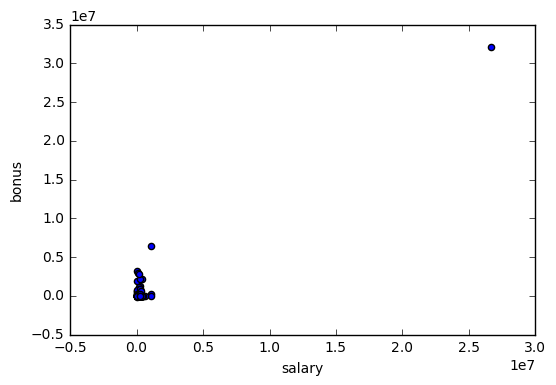

Naive Bayes Accuracy: 0.833333333333
Decision Tree: 1.0
K-means: 0.881944444444
[ 18.57570327   0.21705893   8.86672154   7.2427304   21.06000171
   0.06498431  11.59554766  24.46765405   6.23420114  25.09754153
   4.20497086  10.07245453   9.34670079   2.10765594   1.69882435
   5.34494152   0.1641645    2.42650813   8.74648553   4.95519774]
['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'poi_num_emails']


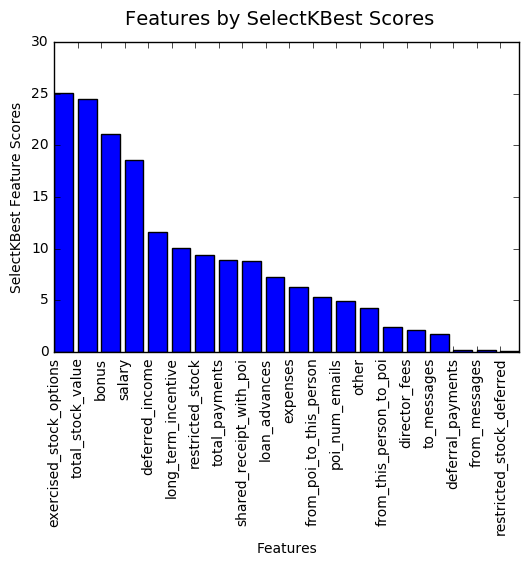

Fitting the classifier to the training set
done in 0.317s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
training time: 0.0 s
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.]
1.0
Fitting the classifier to the training set
done in 0.050s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1

In [10]:
#!/usr/bin/python
# from POI_ID.PY
# P5 ENRON DATASET final project

import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("C:/Users/delrosad/My Documents/nanoDegree/p5 - enron/ud120-projects/tools/")
sys.path.append("C:/Users/delrosad/My Documents/nanoDegree/p5 - enron/ud120-projects/final_project/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
financial_features = ['deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                      'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 
                      'long_term_incentive', 'restricted_stock', 'director_fees'] 
email_features = ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 
                  'shared_receipt_with_poi']

#features_list = ['poi','salary'] # You will need to use more features
# adding the financial & email features
features_list = ['poi','salary'] + financial_features + email_features
#print features_list

### Load the dictionary containing the dataset
with open("C:/Users/delrosad/My Documents/nanoDegree/p5 - enron/ud120-projects/final_project/final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
# Convert to pandas dataframe and get some statistics
all_features = ['salary','deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 
        'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 
        'restricted_stock', 'director_fees','to_messages', 'from_poi_to_this_person', 'from_messages', 
        'from_this_person_to_poi', 'shared_receipt_with_poi']
enron_pd = pd.DataFrame.from_dict(data_dict, orient='index')
enron_pd[all_features] = enron_pd[all_features].astype(float)
print enron_pd.describe()

#how many POIs
poi_count = 0
for p in range(len(enron_pd)):
    if enron_pd['poi'][p] == True:
        poi_count += 1
print "There are", poi_count, "POI (persons of interest) and", 146-poi_count, "non-POI"

# REMOVE "TOTAL" row
# code from Lesson: Enron Outliers to plot
data_out = featureFormat(data_dict, features_list)
for point in data_out:
    salary = point[1]
    bonus = point[2]
    #matplotlib.pyplot.scatter( salary, bonus )
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()
# remove the TOTAL row
data_dict.pop("TOTAL", 0)


### Task 3: Create new feature
### Created a feature called poi_num_emails which is both emails from this person to
### a POI or emails from a POI to this person
for key in data_dict:
    to_poi = data_dict[key]['from_this_person_to_poi']
    from_poi = data_dict[key]['from_poi_to_this_person']
    if to_poi == 'NaN' and from_poi == 'NaN':
        data_dict[key]['poi_num_emails'] = 0
    elif to_poi == 'NaN' and from_poi != 'NaN':
        data_dict[key]['poi_num_emails'] = 0 + from_poi
    elif to_poi != 'NaN' and from_poi == 'NaN':
        data_dict[key]['poi_num_emails'] = to_poi + 0        
    else:
        data_dict[key]['poi_num_emails'] = to_poi + from_poi

features_list = ['poi','salary'] + financial_features + email_features + ['poi_num_emails']

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a variety of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
# GaussianNB
from sklearn.naive_bayes import GaussianNB
from time import time
nb_clf = GaussianNB()

t0=time()
nb_clf.fit(features, labels)
#print "training time:", round(time()-t0, 3), "s"
#print(nb_clf.predict(features_test))

nb_accuracy = nb_clf.score(features, labels)
print "Naive Bayes Accuracy:", nb_accuracy

# Decision Tree
from sklearn import tree
    
#dt_clf = tree.DecisionTreeClassifier(min_samples_split=40)
dt_clf = tree.DecisionTreeClassifier()
    
dt_clf = dt_clf.fit(features, labels)

pred = dt_clf.predict(features)

from sklearn.metrics import accuracy_score
dt_acc = accuracy_score(pred, labels)
print "Decision Tree:", dt_acc

# K-means
from sklearn.cluster import KMeans
km_clf = KMeans(n_clusters=2)
km_clf.fit(features)
pred = km_clf.predict(features)
km_acc = accuracy_score(pred, labels)
print "K-means:", km_acc

# the best one so far
clf = dt_clf
#########################################################

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Find the features with the highest scores
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import cross_validation
import numpy as np

selector = SelectKBest(f_classif, k="all")
selector.fit_transform(features,labels)

# Get the scores
print selector.scores_
print features_list

## Plot SelectKBest features ##
kfeatures_list = ['salary'] + financial_features + email_features + ['poi_num_emails']
y = np.array(selector.scores_)

kfeatures_scores_dict = dict(zip (kfeatures_list, y))
kfeatures_scores = sorted(kfeatures_scores_dict.items(), key=lambda x: x[1], reverse=True)

kfeatures1 = []
kscores1 = []
kfeatures_values = []

kf_count = 0
for kfeats in kfeatures_scores:
    kfeatures1.append(kfeatures_scores[kf_count][0])
    kscores1.append(kfeatures_scores[kf_count][1])
    kfeatures_values.append(kf_count)
    kf_count += 1
    
# Now plot
plt.figure().suptitle('Features by SelectKBest Scores', fontsize = 14)
plt.xticks(kfeatures_values, kfeatures1, rotation=90)
plt.bar(kfeatures_values, kscores1)
plt.xlabel('Features')
plt.ylabel('SelectKBest Feature Scores')
plt.show()
## Plot SelectKBest features ##

# rerun with highest scores features
# salary, bonus, total stock value, exercised stock options
features_list = ['poi','salary', 'bonus', 'total_stock_value', 'exercised_stock_options']
# if you run with the 8 highest scores for features + my poi_num_emails
#features_list = ['poi','salary', 'bonus', 'total_stock_value', 'exercised_stock_options',
#                'deferred_income','long_term_incentive','restricted_stock','shared_receipt_with_poi', 'poi_num_emails']

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

# Train a SVC classification model
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
print "Fitting the classifier to the training set"
t0 = time()
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }

# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
grid_clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
grid_clf = grid_clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print grid_clf.best_estimator_

# re-running with results of grid_clf.best_estimator
svc_clf = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
t0=time()
svc_clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"
print(svc_clf.predict(features_train))
pred = svc_clf.predict(features_train)
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(pred, labels_train)
print svc_acc

# Train a Decision Tree classification model
from sklearn.cross_validation import KFold
from sklearn.cross_validation import  cross_val_score
print "Fitting the classifier to the training set"
t0 = time()
param_grid = {'max_depth': range(2, 7)}
grid_clf_tree = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
grid_clf_tree.fit(features_train, labels_train)

print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print grid_clf_tree.best_estimator_

## Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rescaled_features = scaler.fit_transform(features_train)
rescaled_features
feature_scaling_clf = km_clf.fit(rescaled_features, labels_train)
feature_scaling_pred = km_clf.predict(rescaled_features)

feature_scaling_acc = accuracy_score(feature_scaling_pred, labels_train)
print "K-means with Feature Scaling:", feature_scaling_acc


# Decision Tree
# re-running with results of grid_clf_tree.best_estimator
tree_clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
tree_clf = tree_clf.fit(features_train, labels_train)
pred = tree_clf.predict(features_train)

##  the best one now
#clf = svc_clf
#clf = tree_clf
clf = dt_clf

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
dump_classifier_and_data(clf, my_dataset, features_list)

In [13]:
#!/usr/bin/pickle
### TESTER.PY

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.79108	Precision: 0.32655	Recall: 0.33700	F1: 0.33169	F2: 0.33486
	Total predictions: 13000	True positives:  674	False positives: 1390	False negatives: 1326	True negatives: 9610

